<span style="font-size:2em;">**Red Wine Quality Dataset**</span>

The Red Wine Quality dataset contains information about various physicochemical properties of wines.

This dataset only has numeric variables:

- **fixed acidity:** Influences the flavor of the wine. A significant reduction in acids can lead to wines that taste flat. Examples of fixed acids are tartaric, malic, citric, and succinic, which can be found in grapes (except succinic). It is measured in g/dm3.
- **volatile acidity:** These acids must be distilled out from the wine before the end of the production process. Excess of volatile acids are undesirable and lead to unpleasant flavor. It is measured in g/dm3.
- **citric acid:** The amount of citric acid in the wine, which most of it is usually consumed during the fermentation process. It acts as a preservative and small quantities can add freshness and flavor. It is measured in g/dm3.
- **residual sugar:** The amount of sugar remaining after the end of the fermentation. The goal is to have a perfect balance between sweetness and sourness. Wines with more than 45g/dm3 are considered sweet. It is measured in g/dm3.
- **chlorides:** The amount of salt in the wine.
- **free sulfur dioxide:** The amount of sulfur dioxide (SO2) in free form. They are also known as sulfites and too much of it is undesirable and gives a pungent odour. It is measured in g/dm3.
- **total sulfur dioxide:** The total amount of SO2 in the wine. This is added to kill harmful bacteria and preserve quality and freshness. It is measured in mg/dm3.
- **density:** It is used as a measure of the conversion of sugar to alcohol. Sweeter wines have higher density.
- **pH:** Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic).
- **sulphates:** The amount of mineral salts containing sulfur in the wine. It is an additive which can contribute to sulfur dioxide gas (S02) levels and acts as an antimicrobial and antioxidant. They are related to the fermentation process and affect the aroma and flavor of the wine. 
- **alcohol:** Alcohol is formed as a result of yeast converting sugar during the fermentation process. It's usually measured in % volume or alcohol by volume (ABV).
- **quality:** A quality label in the range of 0 (very bad) to 10 (very excellent). It is the median of at least three evaluations made by wine experts.

# Imports

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from collections import Counter
from scipy.stats import skew
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'axes.edgecolor':'gray', 
            'axes.labelcolor': 'gray', 
            'xtick.color': 'gray', 
            'ytick.color': 'gray', 
            'text.color': 'gray',
            'figure.figsize': (20, 10), 
            'legend.fontsize': 12, 
            'font.size': 12, 
            'legend.title_fontsize': 14, 
            'axes.labelsize': 14, 
            'axes.titlesize': 24}, 
        style='white')

# Descriptive Statistics

Let's load the dataset, look at the descriptive statistics and check for missing values.

In [24]:
df_wine = pd.read_csv('../data/raw/winequality-red.csv')

In [25]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


First, we are renaming the columns and their values for plotting purposes.

In [26]:
df_wine.rename(columns={'fixed acidity': 'Fixed Acidity', 
                   'volatile acidity': 'Volatile Acidity', 
                   'citric acid': 'Citric Acid',
                   'residual sugar': 'Residual Sugar',
                   'chlorides': 'Chlorides',
                   'free sulfur dioxide': 'Free Sulfur Dioxide',
                   'total sulfur dioxide': 'Total Sulfur Dioxide',
                   'density': 'Density',
                   'pH': 'pH',
                   'sulphates': 'Sulphates',
                   'alcohol': 'Alcohol',
                   'quality': 'Quality'}, inplace=True)

In [27]:
df_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
Fixed Acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Volatile Acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Citric Acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Residual Sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Free Sulfur Dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Total Sulfur Dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Most wines have a lower density than water, which means they are not too sweet.

All wines have a pH less than or equal to 4.01, so they are acidic.

75% of the wines have less than 11.1 of alcohol and the wine with more alcohol has 14.9.

Quality goes from 3 to 8 and the mean is 5.64.

In [28]:
df_wine.isnull().sum()

Fixed Acidity           0
Volatile Acidity        0
Citric Acid             0
Residual Sugar          0
Chlorides               0
Free Sulfur Dioxide     0
Total Sulfur Dioxide    0
Density                 0
pH                      0
Sulphates               0
Alcohol                 0
Quality                 0
dtype: int64

There are no missing values in the dataset.

# Data Visualization

We will walk through this section asking some interesting questions.

**What is the proportion of each quality level?**

In [29]:
quality = df_wine['Quality'].value_counts(normalize=True).sort_index(ascending=True)
quality *= 100

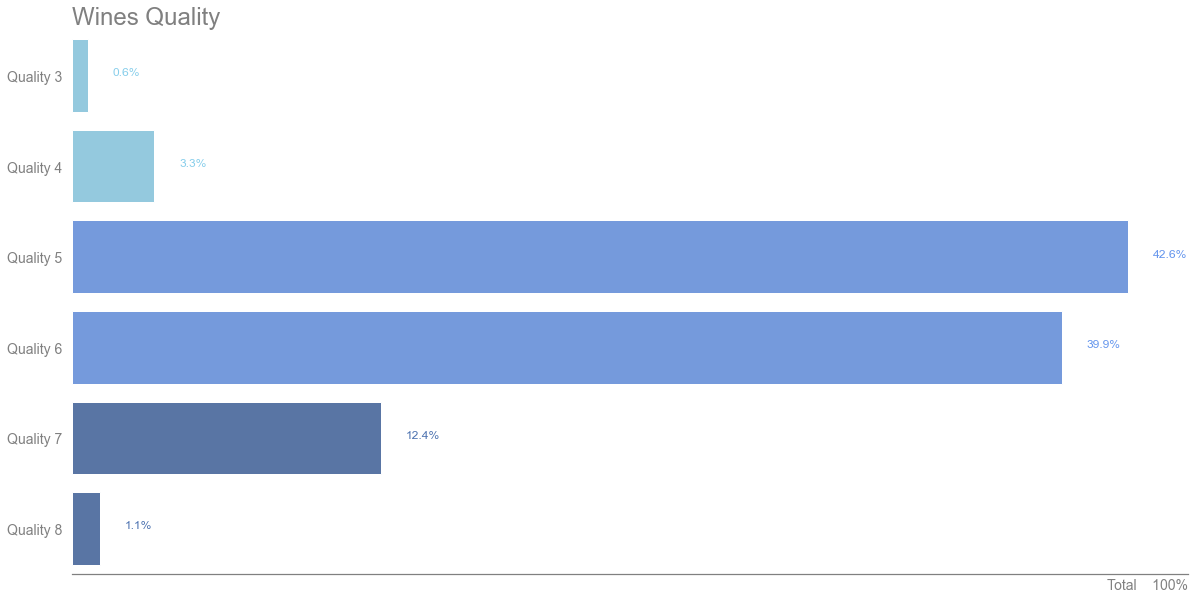

In [30]:
palette_mapping = {0: 'skyblue', 1: 'skyblue', 2: 'cornflowerblue', 3: 'cornflowerblue', 4: 'b', 5: 'b'}
palette = list(palette_mapping.values())

ax = sns.barplot(y=quality.index, x=quality.values, orient='h', palette=palette)

ax.set_xlim(0, 45)
ax.set_xlabel(xlabel='Total    100%', loc='right')
ax.set_xticks([])

yticklabels = ['Quality 3', 'Quality 4', 'Quality 5', 'Quality 6', 'Quality 7', 'Quality 8']
ax.set_yticklabels(yticklabels, size=14)

ax.set_title('Wines Quality', loc='left')

sns.despine(top=True, right=True, left=True)

for index, value in enumerate(quality): 
    plt.annotate(f'{value:.1f}%', xy=(value + 1, index), color=palette_mapping[index]) 

82.5% of the wines have an average quality (5 or 6), 13.5% of the wines are of good quality (7 or 8) and only 3.9% of the wines are of below average quality.

**How is alcohol concentration distributed?**

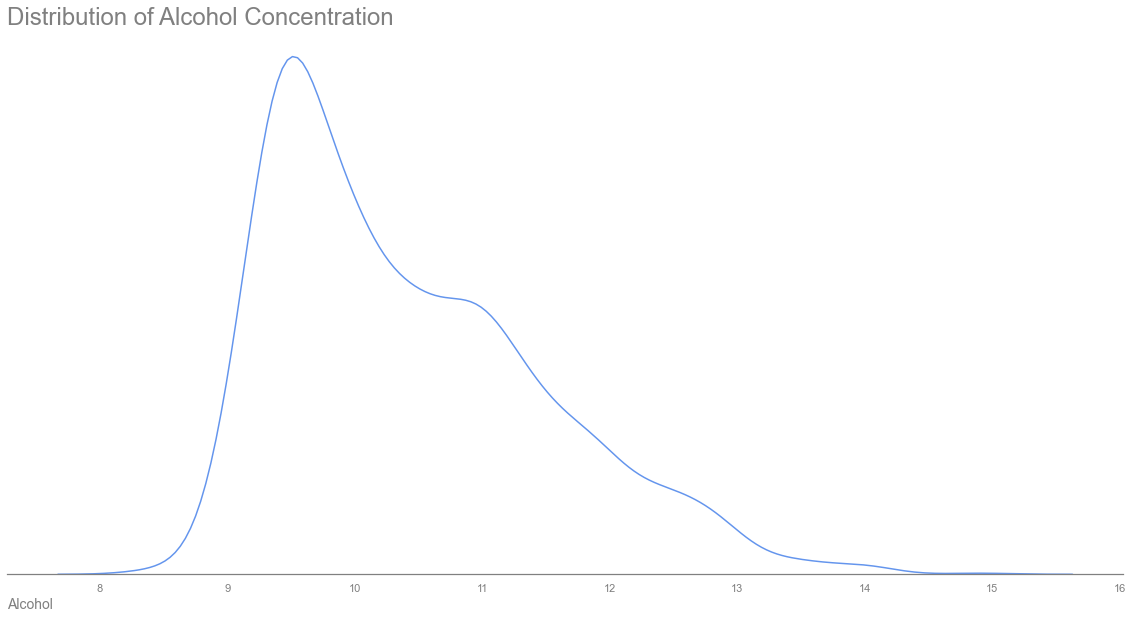

In [31]:
ax = sns.kdeplot(df_wine['Alcohol'], color='cornflowerblue')

ax.set_xlabel(xlabel='Alcohol', loc='left')
ax.set_xticklabels(labels=ticker.FormatStrFormatter('%d').format_ticks(ax.get_xticks()))

ax.set_ylabel(ylabel='')
ax.set_yticks([])

ax.set_title('Distribution of Alcohol Concentration', loc='left')

sns.despine(top=True, right=True, left=True)

The alcohol distribution is positively skewed. Let's check this using the **skew** method.

In [32]:
print(f"Alcohol skew: {skew(df_wine['Alcohol']):.2f}")

Alcohol skew: 0.86


**Let's have a look at the distribution of other features.**

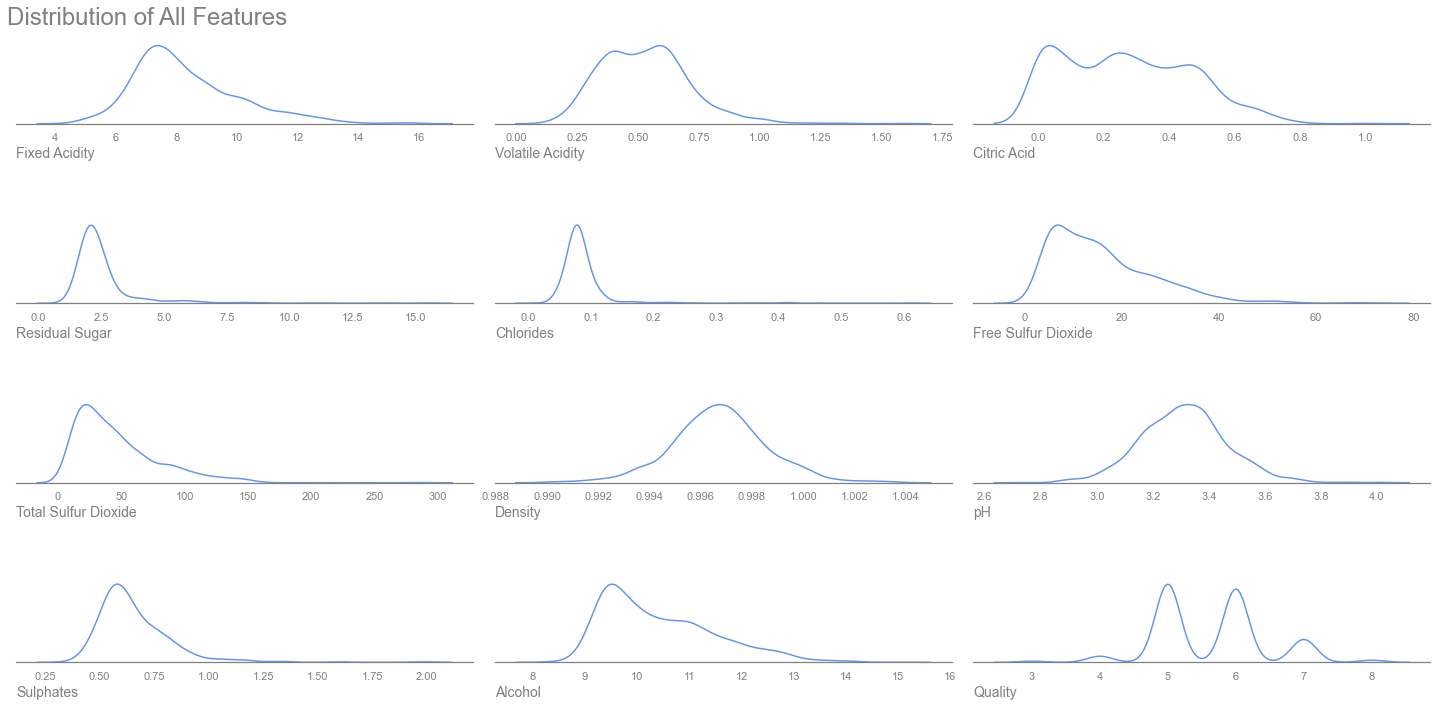

In [39]:
fig, ax = plt.subplots(ncols=3, nrows=4)
index = 0
ax = ax.flatten()

for col, value in df_wine.items():
    sns.kdeplot(value, ax=ax[index], color='cornflowerblue')
    
    ax[index].set_xlabel(xlabel=col, loc='left')

    ax[index].set_ylabel(ylabel='')
    ax[index].set_yticks([])

    sns.despine(top=True, right=True, left=True)
    
    index += 1
    
fig.suptitle('Distribution of All Features', x=0.1, size=24)
plt.tight_layout(w_pad=0.7, h_pad=5.0)

A few features are normally distributed while others are rightly skewed.

**Which wine characteristics are related?**

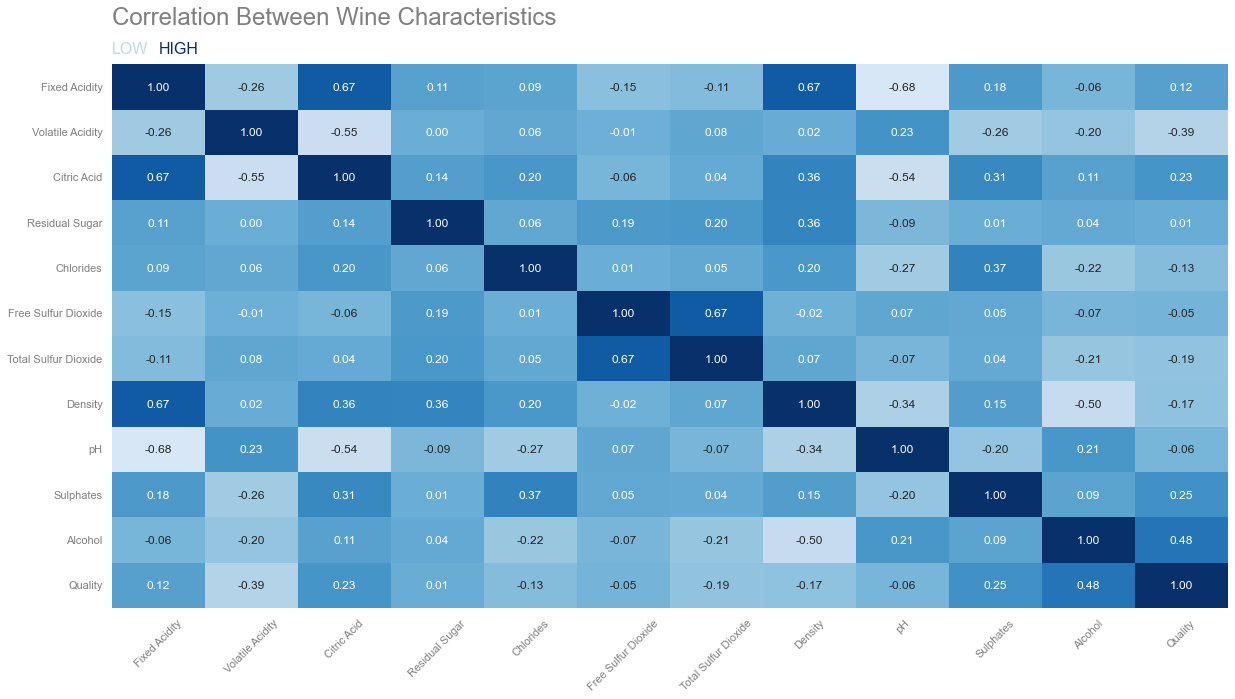

In [40]:
ax = sns.heatmap(df_wine.corr(),
            annot= True,
            annot_kws={'size': 12},
            fmt = '.2f',
            vmin = -1,
            vmax = 1,
            cbar=False,
            cbar_kws={'orientation': 'horizontal'},
            cmap='Blues')

ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45)

ax.annotate('LOW', xy=(0, 0), xytext=(0, -0.25), color='#C3DAEE', size=16)
ax.annotate('HIGH', xy=(0.5, 0), xytext=(0.5, -0.25), color='#07306B', size=16)

ax.set_title('Correlation Between Wine Characteristics', loc='left', pad=40);

* Positive relationships (>= 0.25):
    - Fixed acidity - Citric acid
    - Fixed acidity - Density
    - Citric acid - Density
    - Citric acid - Sulphates
    - Residual sugar - Density
    - Chlorides - Sulphates
    - Free sulfur dioxide - Total sulfur dioxide
    - Sulphates - Quality
    - Alcohol - Quality


* Negative relationships (<= -0.25):
    - Fixed acidity - Volatile acidity
    - Fixed acidity - pH
    - Volatile acidity - Citric acid
    - Volatile acidity - Sulphates
    - Volatile acidity - Quality
    - Citric acid - pH
    - Chlorides - pH
    - Density - pH
    - Density - Alcohol

**Hypothesis:**
 - Sulphates and alcohol have positive influence in the quality
 - Volatile acidity has negative influence in the quality

**Hypothesis check: Alcohol has positive influence in the quality**

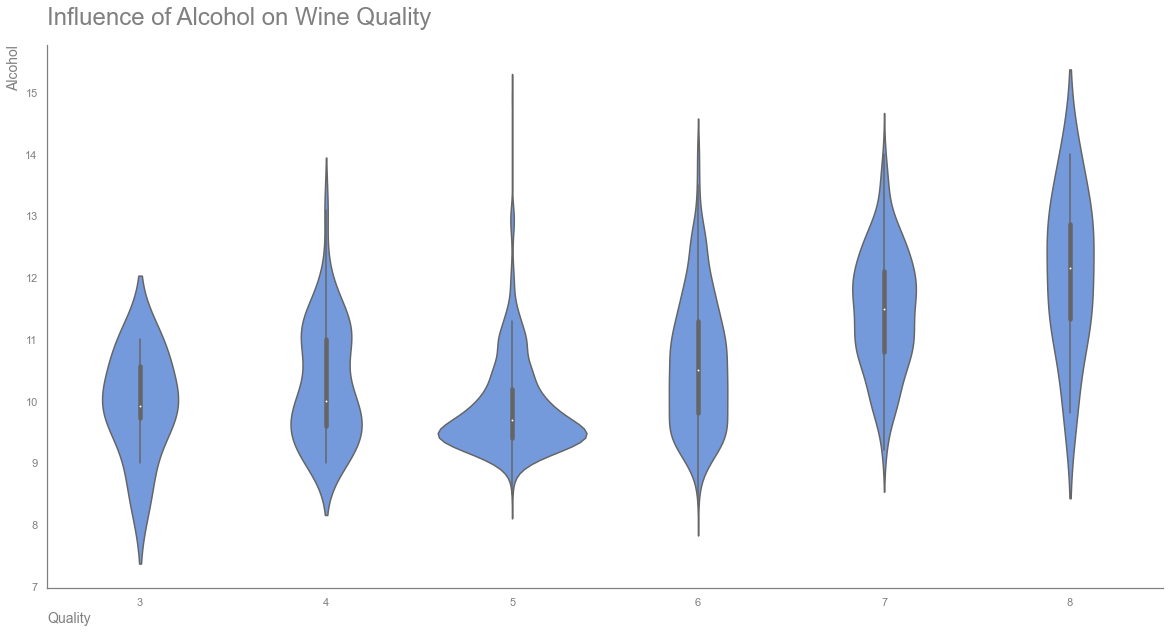

In [41]:
ax = sns.violinplot(x='Quality', y='Alcohol', data = df_wine, color='cornflowerblue')

ax.set_xlabel(xlabel='Quality', loc='left')

ax.set_ylabel(ylabel='Alcohol', loc='top')

ax.set_title('Influence of Alcohol on Wine Quality', loc='left', pad=20)

sns.despine(top=True, right=True)

This hypothesis remains true, the higher the alcohol concentration is, the higher the quality of the wine.

**Hypothesis check: Sulphates have positive influence in the quality**

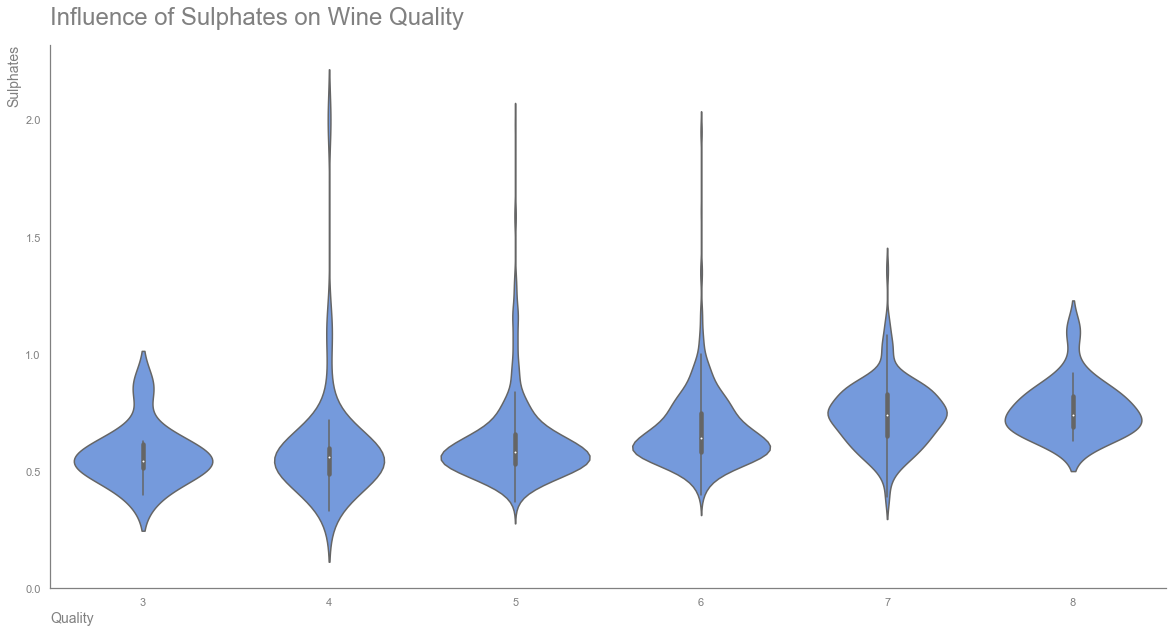

In [42]:
ax = sns.violinplot(x='Quality', y='Sulphates', data = df_wine, color='cornflowerblue')

ax.set_xlabel(xlabel='Quality', loc='left')

ax.set_ylim(bottom=0)
ax.set_ylabel(ylabel='Sulphates', loc='top')

ax.set_title('Influence of Sulphates on Wine Quality', loc='left', pad=20)

sns.despine(top=True, right=True)

This hypothesis also remains true, the higher the concentration of sulphates is, the higher the quality of the wine.

**Hypothesis check: Volatile acidity has negative influence in the quality**

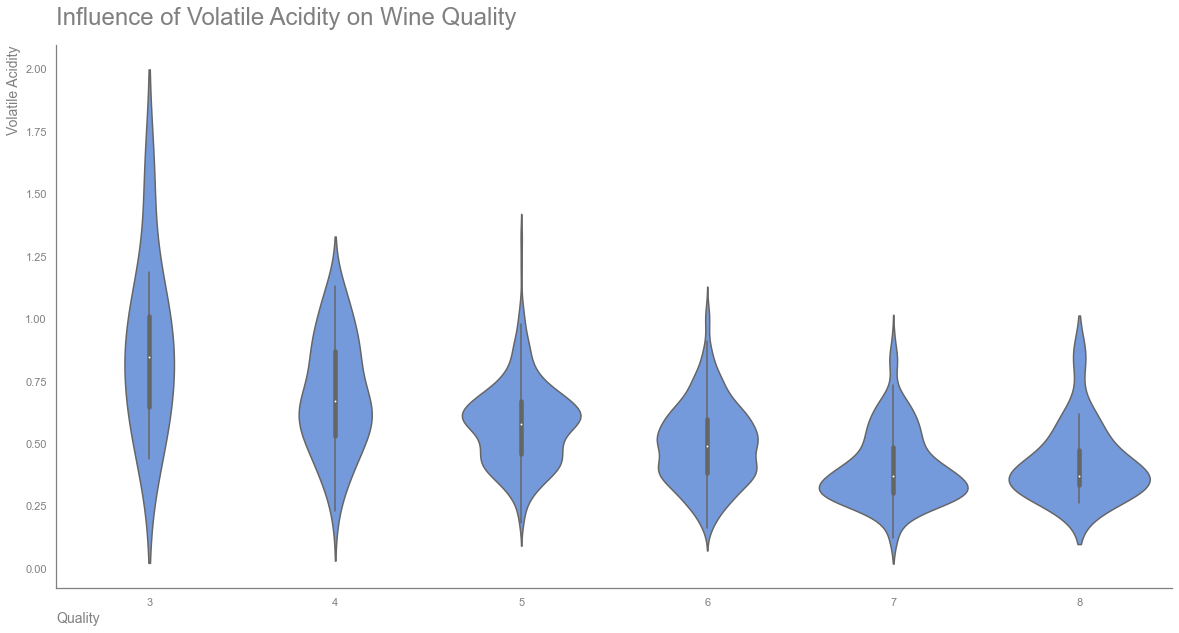

In [43]:
ax = sns.violinplot(x='Quality', y='Volatile Acidity', data = df_wine, color='cornflowerblue')

ax.set_xlabel(xlabel='Quality', loc='left')

ax.set_ylabel(ylabel='Volatile Acidity', loc='top')

ax.set_title('Influence of Volatile Acidity on Wine Quality', loc='left', pad=20)

sns.despine(top=True, right=True)

Once again, the established hypothesis holds true. The higher the volatile acidity, the lower the quality of the wine.

**How do sulphates and alcohol influence the quality of a wine?**

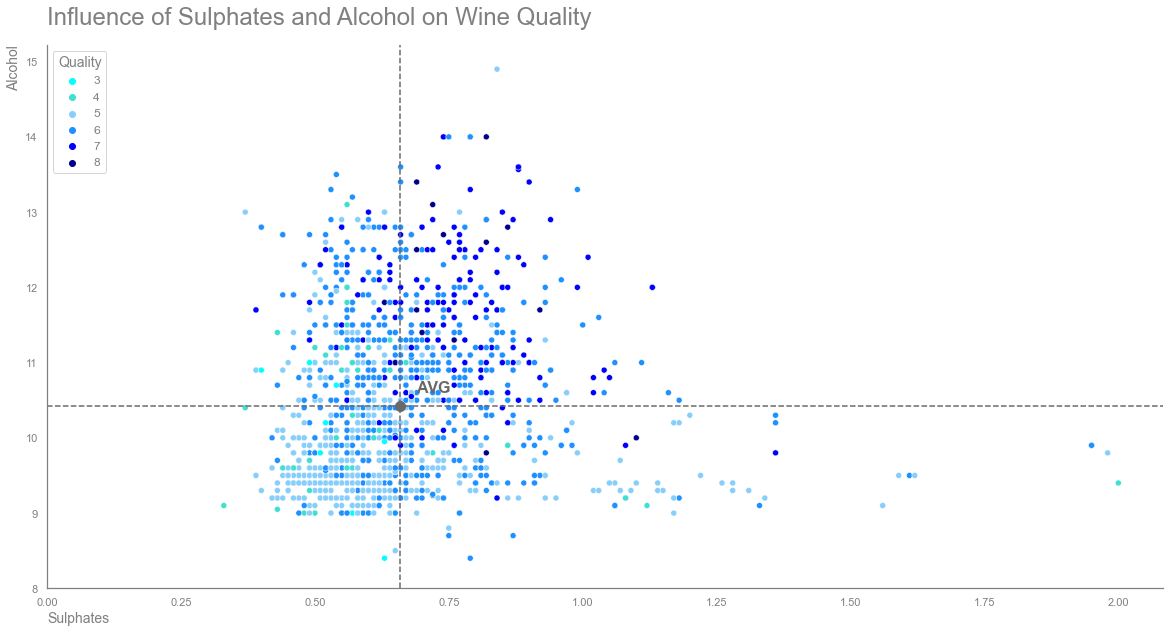

In [44]:
palette = ['cyan', 'turquoise', 'lightskyblue', 'dodgerblue', 'blue', 'darkblue']

ax = sns.scatterplot(x = 'Sulphates', y = 'Alcohol', hue = 'Quality', data = df_wine, palette = palette)

# Plot average
plt.scatter(x=df_wine['Sulphates'].mean(), y=df_wine['Alcohol'].mean(), s=100, color='dimgray')
plt.axvline(x=df_wine['Sulphates'].mean(), color='dimgray', linestyle='dashed')
plt.axhline(y=df_wine['Alcohol'].mean(), color='dimgray', linestyle='dashed')
plt.text(x=0.69, y=10.6, s='AVG', color='dimgray', size=16, weight='bold')

ax.set_xlim(left=0)
ax.set_xlabel(xlabel='Sulphates', loc='left')

ax.set_ylim(bottom=8)
ax.set_ylabel(ylabel='Alcohol', loc='top')

ax.legend(loc='upper left', title='Quality')

ax.set_title('Influence of Sulphates and Alcohol on Wine Quality', loc='left', pad=20)

sns.despine(top=True, right=True)

Let's look at each of the quality levels separately.

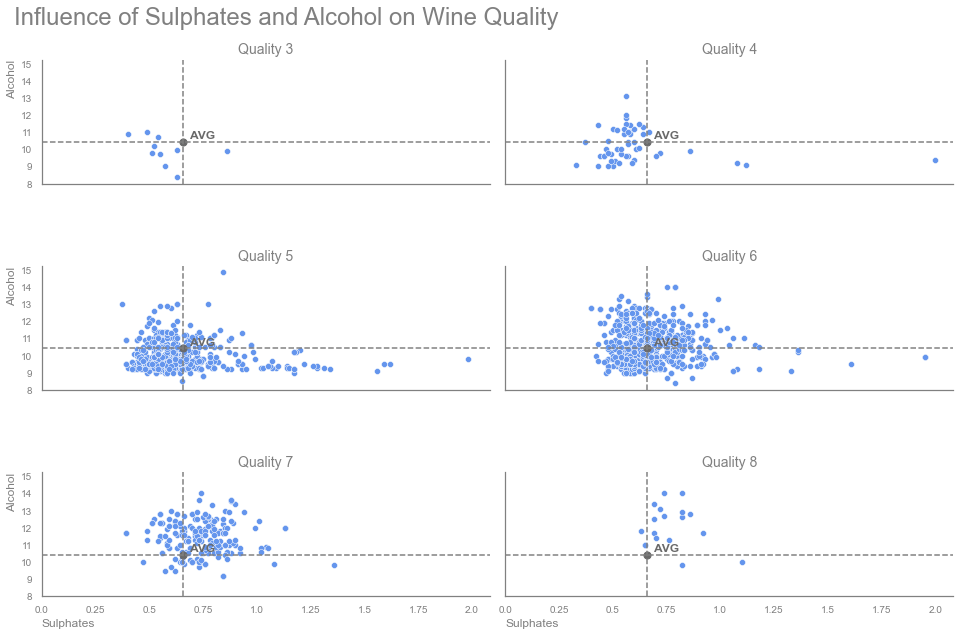

In [45]:
g = sns.FacetGrid(df_wine, col='Quality', col_wrap=2, aspect=2.25)

g.map_dataframe(sns.scatterplot, x = 'Sulphates', y = 'Alcohol', color='cornflowerblue')

# Plot average
g.refline(x=df_wine['Sulphates'].mean(), y=df_wine['Alcohol'].mean())
g.map(plt.scatter, x=df_wine['Sulphates'].mean(), y=df_wine['Alcohol'].mean(), s=50, color='dimgray')
g.map(plt.text, x=0.69, y=10.6, s='AVG', color='dimgray', weight='bold')

xticks = np.arange(0, 2.25, 0.25)
g.set(xticks=xticks)
g.set_xlabels(label='Sulphates', loc='left', size=12)
g.set_xticklabels(labels=xticks, size=10)

yticks = range(8, 16, 1)
g.set(yticks=yticks)
g.set_ylabels(label='Alcohol', loc='top', size=12)
g.set_yticklabels(labels=yticks, size=10)

g.set_titles('Quality {col_name:d}')
g.fig.suptitle('Influence of Sulphates and Alcohol on Wine Quality', x=0.3, size=24)

plt.tight_layout(w_pad=0.7, h_pad=5.0)

It can be seen that the alcohol concentration has a greater influence on the quality of the wine than the sulphates. 

Most of the good wines (quality >=7) have an alcohol concentration greater than 10.42 and sulphates above 0.65.

**How do volatile acidity and alcohol influence the quality of a wine?**

In [46]:
df_wine['Alcohol Round'] = df_wine['Alcohol'].apply(lambda x: round(x))

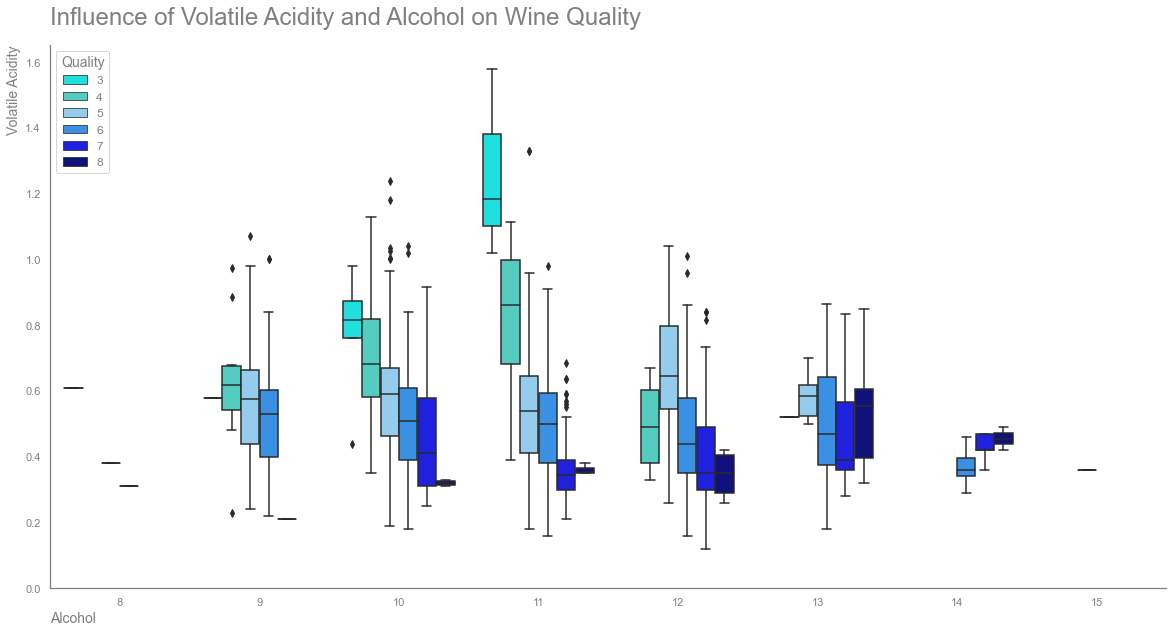

In [47]:
ax = sns.boxplot(x='Alcohol Round', y='Volatile Acidity', hue='Quality', data=df_wine, palette=palette)

ax.set_xlabel(xlabel='Alcohol', loc='left')

ax.set_ylim(bottom=0)
ax.set_ylabel(ylabel='Volatile Acidity', loc='top')

ax.legend(loc='upper left', title='Quality')

ax.set_title('Influence of Volatile Acidity and Alcohol on Wine Quality', loc='left', pad=20)

sns.despine(top=True, right=True)

For alcohol concentration between 9% to 12%, the level of volatile acidity decreases as the alcohol increases. For higher alcohol content, it seems that the opposite happens. However, we should take into account that there are few samples for this range of alcohol content. 

In [48]:
print(f"Percentage of wines with alcohol concentration above 12%: {len(df_wine[df_wine['Alcohol']>12])/len(df_wine) * 100:.2f}%")

Percentage of wines with alcohol concentration above 12%: 8.82%


**Let's take a look at another characteristics less correlated with quality.**

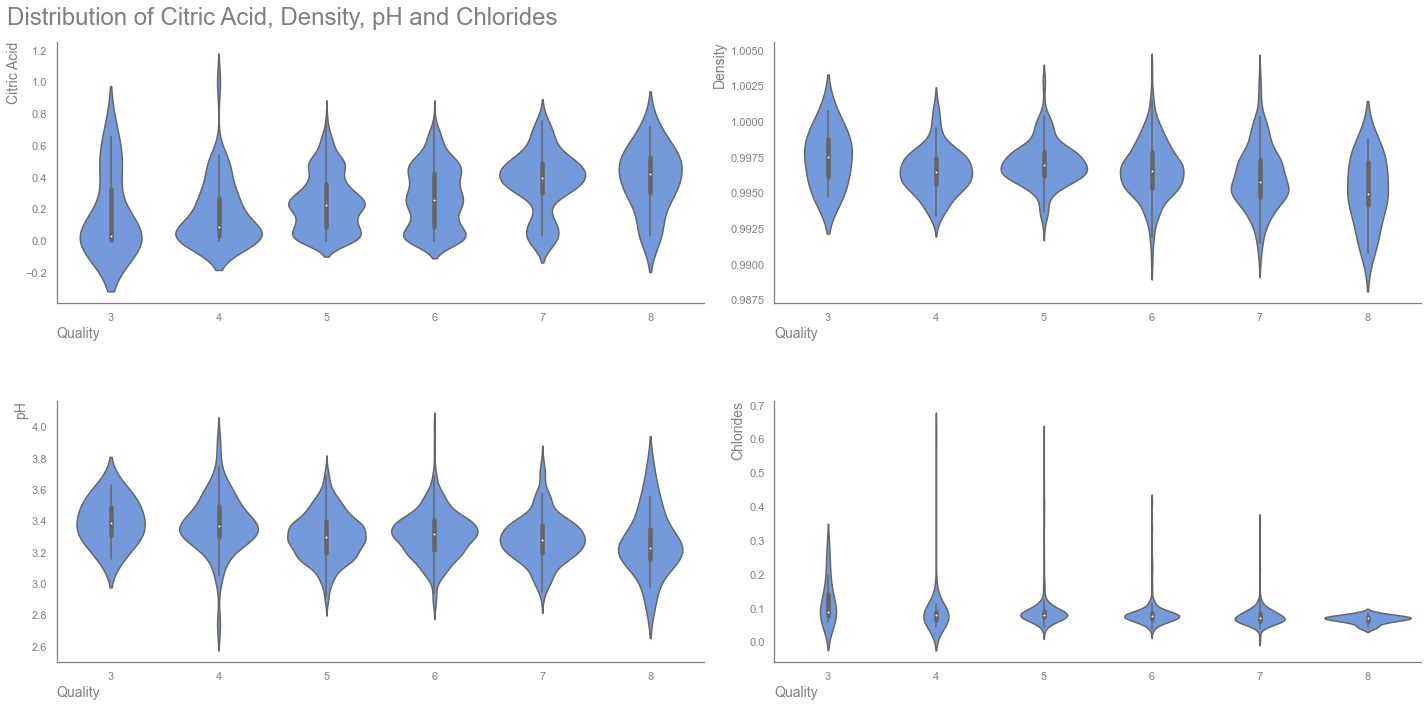

In [50]:
fig, ax = plt.subplots(ncols=2, nrows=2)
index = 0
ax = ax.flatten()

for col in ['Citric Acid', 'Density', 'pH', 'Chlorides']:
    sns.violinplot(x='Quality', y=col, data = df_wine, ax=ax[index], color='cornflowerblue')
        
    ax[index].set_xlabel(xlabel='Quality', loc='left')
    
    ax[index].set_ylabel(ylabel=col, loc='top')

    sns.despine(top=True, right=True)
    
    index += 1
    
fig.suptitle('Distribution of Citric Acid, Density, pH and Chlorides', x=0.2, size=24)
plt.tight_layout(w_pad=0.7, h_pad=5.0)

There is a positive relationship between quality and critic acid.

There are weak negative relationships between quality and density, pH and chlorides.

# Key Findings
 *  Sulphates and alcohol have positive influence in the quality
 *  Volatile acidity has negative influence in the quality

# References

1. Jain, H. (2021). Red Wine Quality - Exploratory Data Analysis. Available at: https://www.kaggle.com/harshjain123/red-wine-quality-exploratory-data-analysis/notebook
2. Agnihotri, P. (2020). Multi-dimensional Data Visualization | EDA. Available at: https://www.kaggle.com/piyushagni5/multi-dimensional-data-visualization-eda/notebook
3. Yeşilöz, S.(2021). Red Wine Quality EDA & Classification. Available at: https://www.kaggle.com/sercanyesiloz/red-wine-quality-eda-classification
4. Nguyen, D. (2020). Red Wine Quality Prediction Using Regression Modeling and Machine Learning. Available at: https://towardsdatascience.com/red-wine-quality-prediction-using-regression-modeling-and-machine-learning-7a3e2c3e1f46
5. Bruce, P., Bruce, A and Gedeck, P. (2017). Practical Statistics for Data Scientists: 50+ Essential Concepts Using R and Python
6. Swaminathan, S. Data Visualization with Python MOOC. Coursera